

# 📘 Outlier Detection using Percentile Winsorization

---

## 🔹 Definition
**Percentile Winsorization** is an outlier treatment technique where extreme values are **capped at selected lower and upper percentiles** instead of being removed.

> It reduces the influence of outliers while preserving dataset size.

---

## 🔹 Why Winsorization is Used(Outliers are capped, not deleted.)
- Outliers distort **mean, variance, and regression**
- Removing data causes **information loss**
- Winsorization provides a **controlled and robust alternative**

---

## 🔹 Core Concept
- Values **below lower percentile** → replaced by lower percentile value  
- Values **above upper percentile** → replaced by upper percentile value  

### Common Percentile Cutoffs
- **1st & 99th percentile**
- **5th & 95th percentile**

---

## 🔹 Mathematical Formula

Let:
- \( x \) = data point  
- \( P_L \) = lower percentile  
- \( P_U \) = upper percentile  

$$
x_{\text{winsorized}} =
\begin{cases}
P_L, & x < P_L \\
x, & P_L \le x \le P_U \\
P_U, & x > P_U
\end{cases}
$$

---

## 🔹 Algorithm (Steps)

1. Choose percentiles (e.g., 5% and 95%)
2. Compute percentile values from data
3. Replace:
   - \( x < P_L \Rightarrow P_L \)
   - \( x > P_U \Rightarrow P_U \)
4. Keep all observations

---

## 🔹 Example

### Original Data
\[
[5,\; 8,\; 10,\; 12,\; 15,\; 18,\; 100,\; 120]
\]

### Using 5th–95th Percentiles
- \( P_5 = 7.2 \)
- \( P_{95} = 96.4 \)

### Winsorized Data
\[
[7.2,\; 8,\; 10,\; 12,\; 15,\; 18,\; 96.4,\; 96.4]
\]

---

## 🔹 Python Implementation

```python
import pandas as pd

data = pd.Series([5, 8, 10, 12, 15, 18, 100, 120])

lower = data.quantile(0.05)
upper = data.quantile(0.95)

winsorized_data = data.clip(lower, upper)


In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Krishnaraj singh\Code\newml\Documents!.0\weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [7]:
import seaborn as sns


<Axes: xlabel='Height', ylabel='Density'>

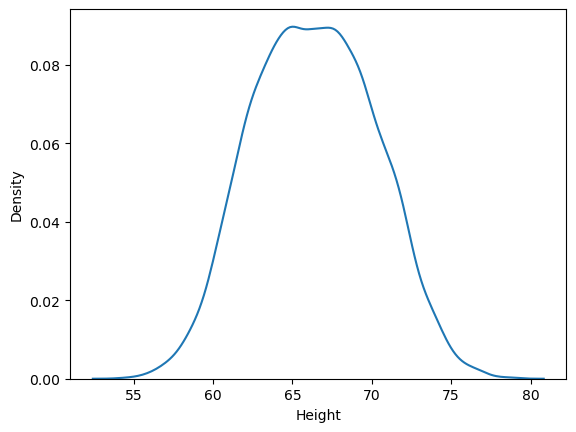

In [8]:
sns.kdeplot(df['Height'])

<Axes: xlabel='Height'>

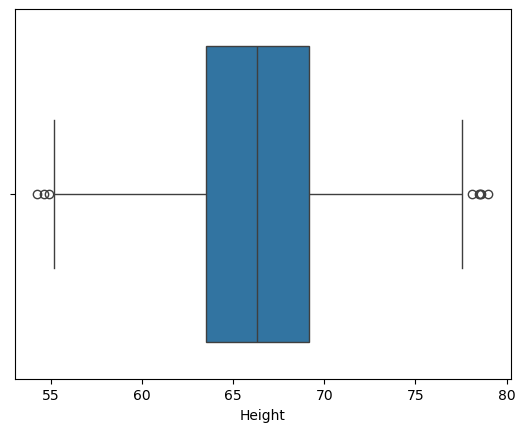

In [10]:
sns.boxplot(x= df['Height'])

In [11]:
up_li = df['Height'].quantile(0.99)
lo_li = df['Height'].quantile(0.01)

In [12]:
up_li

np.float64(74.7857900583366)

In [13]:
lo_li

np.float64(58.13441158671655)

In [16]:
df[(df['Height']>=up_li) | (df['Height']<=lo_li)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [18]:
n_df = df[(df['Height']<=up_li) & (df['Height']>=lo_li)]

In [19]:
n_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [21]:
print(df['Height'].describe())
print(n_df['Height'].describe())

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64
count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64


<Axes: xlabel='Height', ylabel='Density'>

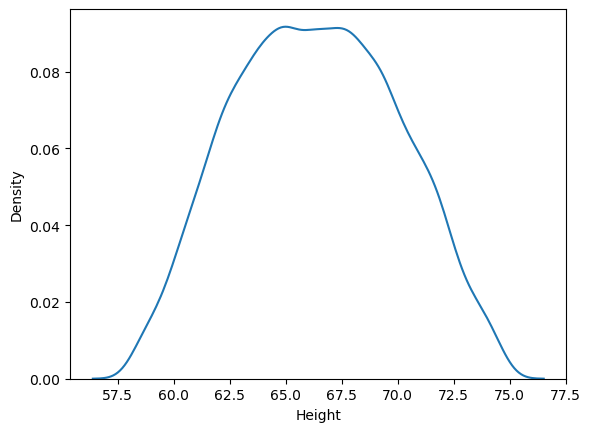

In [25]:
# sns.boxplot(n_df['Height'])
sns.kdeplot(n_df['Height'])

In [30]:
# Capping --> Winsorization

# new_dff = df.copy()

df['Height'] = np.where(
    df['Height']>=up_li,
    up_li,
    np.where(
        df['Height']<=lo_li,
        lo_li,
        df['Height']
    )
)

In [31]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

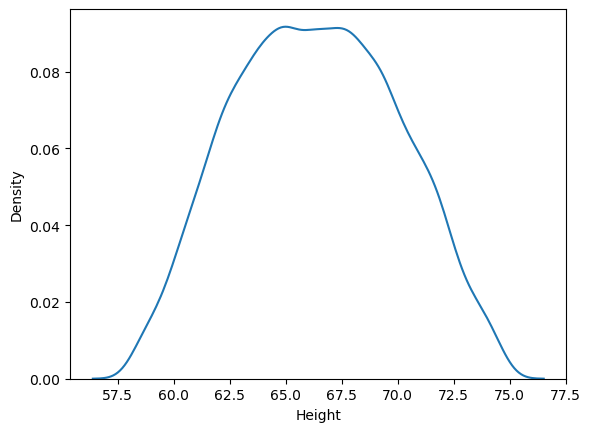

In [32]:
sns.kdeplot(n_df['Height'])

<Axes: xlabel='Height'>

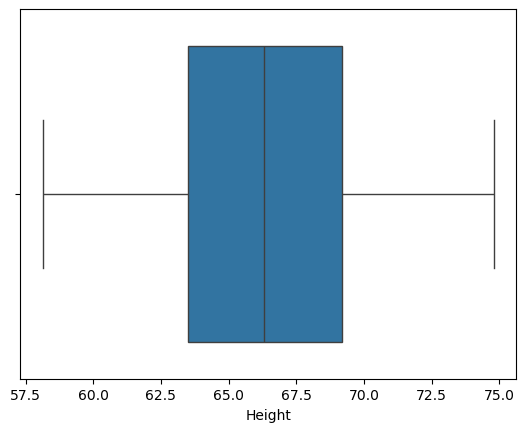

In [36]:
sns.boxplot(x=df['Height'])